In [162]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [163]:
consumerpricedata = pd.read_csv(r"D:\WORK\datascience\practice\Consumer-Price-Index-Analysis\All-India-Consumer-Price-Index.csv")

In [164]:
consumerpricedata.head(10)

,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,Rural,2013,January,107.5,106.3,108.1,104.9,106.1,103.9,101.9,...,NaN,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1
1,Urban,2013,January,110.5,109.1,113.0,103.6,103.4,102.3,102.9,...,100.3,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0
2,Rural+Urban,2013,January,108.4,107.3,110.0,104.4,105.1,103.2,102.2,...,100.3,105.5,104.8,104.0,103.2,103.1,103.6,104.5,103.9,104.6
3,Rural,2013,February,109.2,108.7,110.2,105.4,106.7,104.0,102.4,...,NaN,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8
4,Urban,2013,February,112.9,112.9,116.9,104.0,103.5,103.1,104.9,...,100.4,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7
5,Rural+Urban,2013,February,110.4,110.2,112.8,104.9,105.5,103.6,103.2,...,100.4,106.0,105.2,104.5,104.2,103.6,103.9,104.5,104.4,105.3
6,Rural,2013,March,110.2,108.8,109.9,105.6,106.2,105.7,101.4,...,NaN,106.1,105.6,104.7,104.6,104.0,104.3,104.3,104.6,106.0
7,Urban,2013,March,113.9,111.4,113.2,104.3,102.7,104.9,103.8,...,100.4,106.0,105.7,105.2,105.5,103.5,103.8,104.2,104.9,105.0
8,Rural+Urban,2013,March,111.4,109.7,111.2,105.1,104.9,105.3,102.2,...,100.4,106.1,105.6,104.9,105.1,103.7,104.0,104.3,104.7,105.5
9,Rural,2013,April,110.2,109.5,106.9,106.3,105.7,108.3,103.4,...,NaN,106.5,106.1,105.1,104.4,104.5,104.8,102.7,104.6,106.4


In [165]:
consumerpricedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 30 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Sector                               365 non-null    object 
 1   Year                                 365 non-null    int64  
 2   Month                                365 non-null    object 
 3   Cereals and products                 362 non-null    float64
 4   Meat and fish                        359 non-null    float64
 5   Egg                                  362 non-null    float64
 6   Milk and products                    362 non-null    float64
 7   Oils and fats                        362 non-null    float64
 8   Fruits                               362 non-null    float64
 9   Vegetables                           362 non-null    float64
 10  Pulses and products                  362 non-null    float64
 11  Sugar and Confectionery         

In [166]:
consumerpricedata.isnull()

,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
361,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
362,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
363,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False


In [167]:
#consumerpricedata['Year'] = pd.to_datetime(consumerpricedata['Year']).astype(str)

In [168]:
#consumerpricedata.info()

In [169]:
consumerpricedata['Month'] = consumerpricedata['Month'].str.strip()

In [170]:
consumerpricedata.head()

,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Housing,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index
0,Rural,2013,January,107.5,106.3,108.1,104.9,106.1,103.9,101.9,...,NaN,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1
1,Urban,2013,January,110.5,109.1,113.0,103.6,103.4,102.3,102.9,...,100.3,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0
2,Rural+Urban,2013,January,108.4,107.3,110.0,104.4,105.1,103.2,102.2,...,100.3,105.5,104.8,104.0,103.2,103.1,103.6,104.5,103.9,104.6
3,Rural,2013,February,109.2,108.7,110.2,105.4,106.7,104.0,102.4,...,NaN,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8
4,Urban,2013,February,112.9,112.9,116.9,104.0,103.5,103.1,104.9,...,100.4,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7


In [171]:
consumerpricedata['Month'] = consumerpricedata['Month'].replace('Marcrh','March')

In [172]:
consumerpricedata['Date'] = pd.to_datetime((consumerpricedata['Year']).astype(str) + '-' + consumerpricedata['Month'].str.strip(), format='%Y-%B')


In [173]:
consumerpricedata['Date'].head()

0   2013-01-01
1   2013-01-01
2   2013-01-01
3   2013-02-01
4   2013-02-01
Name: Date, dtype: datetime64[ns]

In [174]:
consumerpricedata.head()

,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index,Date
0,Rural,2013,January,107.5,106.3,108.1,104.9,106.1,103.9,101.9,...,105.5,104.8,104.0,103.3,103.4,103.8,104.7,104.0,105.1,2013-01-01
1,Urban,2013,January,110.5,109.1,113.0,103.6,103.4,102.3,102.9,...,105.4,104.8,104.1,103.2,102.9,103.5,104.3,103.7,104.0,2013-01-01
2,Rural+Urban,2013,January,108.4,107.3,110.0,104.4,105.1,103.2,102.2,...,105.5,104.8,104.0,103.2,103.1,103.6,104.5,103.9,104.6,2013-01-01
3,Rural,2013,February,109.2,108.7,110.2,105.4,106.7,104.0,102.4,...,106.2,105.2,104.4,103.9,104.0,104.1,104.6,104.4,105.8,2013-02-01
4,Urban,2013,February,112.9,112.9,116.9,104.0,103.5,103.1,104.9,...,105.7,105.2,104.7,104.4,103.3,103.7,104.3,104.3,104.7,2013-02-01


In [175]:
Rural_Urban_cpi = consumerpricedata[consumerpricedata['Sector'] == 'Rural+Urban'].sort_values('Date')

In [176]:
Rural_Urban_cpi.head()

,Sector,Year,Month,Cereals and products,Meat and fish,Egg,Milk and products,Oils and fats,Fruits,Vegetables,...,Fuel and light,Household goods and services,Health,Transport and communication,Recreation and amusement,Education,Personal care and effects,Miscellaneous,General index,Date
2,Rural+Urban,2013,January,108.4,107.3,110.0,104.4,105.1,103.2,102.2,...,105.5,104.8,104.0,103.2,103.1,103.6,104.5,103.9,104.6,2013-01-01
5,Rural+Urban,2013,February,110.4,110.2,112.8,104.9,105.5,103.6,103.2,...,106.0,105.2,104.5,104.2,103.6,103.9,104.5,104.4,105.3,2013-02-01
8,Rural+Urban,2013,March,111.4,109.7,111.2,105.1,104.9,105.3,102.2,...,106.1,105.6,104.9,105.1,103.7,104.0,104.3,104.7,105.5,2013-03-01
11,Rural+Urban,2013,April,111.6,110.9,106.6,105.7,104.4,108.9,105.5,...,106.5,106.3,105.3,104.7,104.2,105.0,102.9,104.8,106.1,2013-04-01
14,Rural+Urban,2013,May,112.3,111.3,104.7,106.8,103.9,109.3,112.9,...,107.4,106.9,105.9,104.0,104.8,105.6,102.3,104.8,106.9,2013-05-01


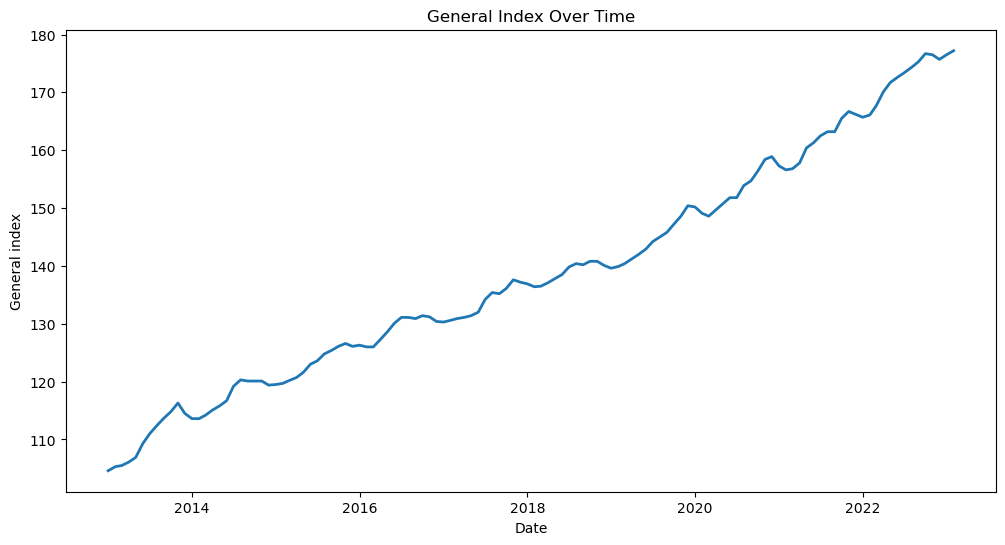

In [177]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=Rural_Urban_cpi,x='Date',y='General index',linewidth='2',markers=True)
plt.xlabel("Date")             
plt.ylabel("General index")     
plt.title("General Index Over Time")  

plt.show() 


In [178]:
Rural_Urban_cpi.set_index('Date', inplace=True)
monthlycpi = Rural_Urban_cpi['General index'].resample('M').mean().interpolate(method='linear')
decompose = seasonal_decompose(monthlycpi,model='multiplicative',period=12)

AttributeError: 'DecomposeResult' object has no attribute 'head'